In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func 

In [4]:
Base=automap_base()

In [5]:
# create engine to hawaii.sqlite 
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
date_all=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date=date_all[0]
most_recent_date

'2017-08-23'

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
import datetime as dt


# Calculate the date one year from the last date in data set.

one_year_ago=dt.date(2017,8,23)-dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results=session.query(Measurement.date,Measurement.prcp).\
    filter((Measurement.date>=one_year_ago)&(Measurement.date<=most_recent_date)).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
dates=[]
prcp=[]
for t in results:
    dates.append(t[0])
    prcp.append(t[1])

df=pd.DataFrame({'Date':dates,'prcp':prcp},columns=['Date','prcp'])
# Sort the dataframe by date
df.sort_values(by=['Date'],ascending=True)
df.fillna(value=0,inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
df.set_index(['Date'],inplace=True)
df

,prcp
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,0.00
2017-08-21,0.56


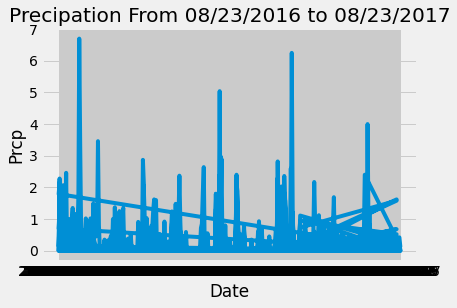

In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Prcp')
plt.title('Precipation From 08/23/2016 to 08/23/2017')
plt.show()

In [34]:
df.describe()

,prcp
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts=session.query(Measurement.station,func.count(Measurement.date)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()

active_station=station_counts[0][0]
active_station

'USC00519281'

In [15]:
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
avg_active_station=session.query(func.avg(Measurement.prcp)).\
    filter(Measurement.station==active_station).\
    group_by(Measurement.station).all()[0][0]
avg_active_station

0.2123520923520915

In [17]:
highest_active_station=session.query(func.max(Measurement.prcp)).\
    filter(Measurement.station==active_station).all()[0][0]
highest_active_station

9.64

In [18]:
lowest_active_station=session.query(func.min(Measurement.prcp)).\
    filter(Measurement.station==active_station).first()[0]
lowest_active_station

0.0

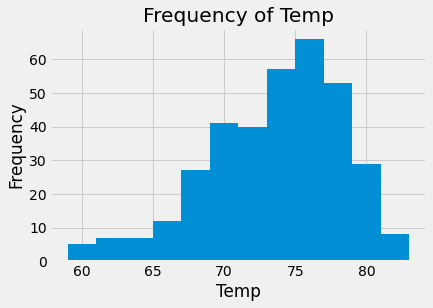

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_results=session.query(Measurement.tobs).\
    filter((Measurement.date>=one_year_ago)&(Measurement.date<=most_recent_date)&(Measurement.station==active_station)).\
    all()

tobs_df = pd.DataFrame(tobs_results, columns=['tobs'])
#tobs_df.hist(bin=12)
plt.hist(tobs_df['tobs'],bins=12)
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.title('Frequency of Temp')
plt.show()

# Close session

In [38]:
# Close Session
session.close()